# Baltimore Crime Analysis

-------

### Data analysis and visualization of Baltimore Crime Data from 2012 to 2016.  

In this project, I am going to explore more about crime in Baltimore and try to answer the following questions:
* Which crimes are most frequently committed? 
* How has the number of crimes changed over time in Baltimore? 
* What category of crimes were increasing and which were decreasing over time?
* Which of the Baltimore Districts had an increasing and which had a decreasing amount of crime events? 
* Are there certain high crime locations for certain crimes?  
* Which season was getting the most crimes? 
* Which part of a day most of the crimes were committed? 
* Which day of the week had the highest rate of committed crimes?
* Were the majority of crimes committed outside or inside?

----------

## 1. Data preparation

-----------

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import missingno as msno 
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio 
pio.renderers.default = "png" #for switching interactive visualizations to static 

In [2]:
df=pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')

In [3]:
df.head() 

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [4]:
print(f'Number of observations: {df.shape[0]}')
print(f'Number of variables: {df.shape[1]}')

Number of observations: 276529
Number of variables: 15


In [5]:
df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

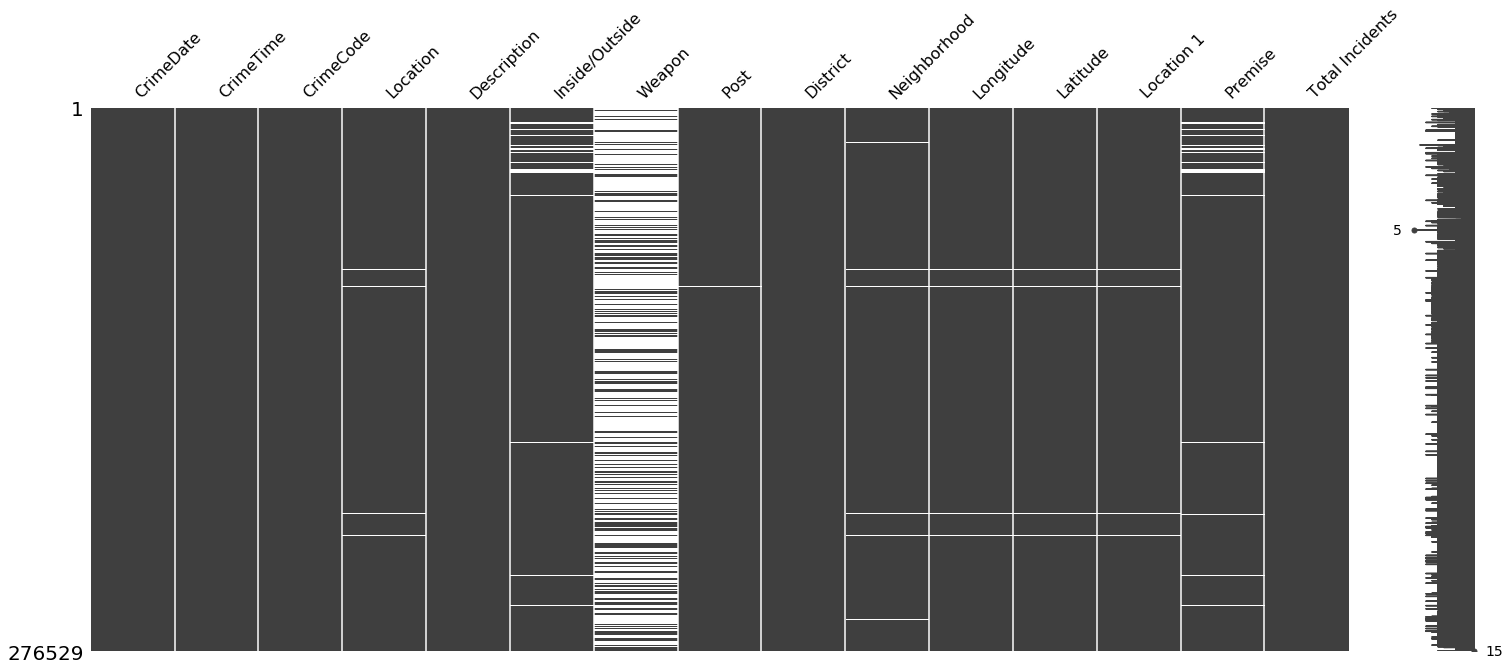

In [6]:
# Looking for a patterns in missing data 

msno.matrix(df); 

* We can notice the same pattern in 'Longitude','Latitude' and 'Location' columns. We can find also pattern between 'Inside/Outside' and 'Premise' columns. The column that is missing the most data is the 'Weapon' column. 

In [7]:
df.isna().sum()  # checking how many missing values we have in each column

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

In [8]:
df = df.dropna(thresh=int(df.shape[0]*.9),axis=1) # droping columns that have less than 90% of data

In [9]:
# removing 'Premise',Total Incidents', 'Post','CrimeCode' ,'Location 1','Location' columns, because we won't be using them

df.drop(['Premise','Total Incidents','Post','Location 1','CrimeCode','Location'],axis=1,inplace=True) 

In [10]:
df.info() # checking if we still have missing data and also checking data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CrimeDate       276529 non-null  object 
 1   CrimeTime       276529 non-null  object 
 2   Description     276529 non-null  object 
 3   Inside/Outside  266250 non-null  object 
 4   District        276449 non-null  object 
 5   Neighborhood    273789 non-null  object 
 6   Longitude       274325 non-null  float64
 7   Latitude        274325 non-null  float64
dtypes: float64(2), object(6)
memory usage: 16.9+ MB


In [11]:
df.dropna(inplace=True)

In [12]:
# checking what are the unique values in'Inside/Outside' column, since we already notice that there is something wrong going on

df['Inside/Outside'].unique()

array(['I', 'O', 'Outside', 'Inside'], dtype=object)

* Looking on the output we can notice that we have 4 unique values in that columns, so next step will be changing it for: Outside and Inside 

In [13]:
# changing I and O to Outside and Inside 

df['Inside/Outside'].replace(['O', 'I'], ['Outside', 'Inside'], inplace=True)

In [14]:
# changing type of 'CrimeDate' column to datetime

df['CrimeDate']=pd.to_datetime(df['CrimeDate']) 

# extracting year and month from 'CrimeDate' and adding it to dataframe as two new columns

df['Year'] = df['CrimeDate'].dt.year 
df['Month'] = df['CrimeDate'].dt.month
# checking what years we have in our dataframe
df['Year'].unique()
df = df[df.Year != 2017]   # removing 2017 since only years 2012 - 2016 will be analyzed

# creating a new column with seasons, so we could later analyze in which season more crimes are committed

def seasons(x):
    if (x >= 3) and (x < 6):
        return 'Spring'
    elif (x >= 6) and (x < 9 ):
        return 'Summer'
    elif (x >=9) and (x < 12):
        return'Autumn'
    else:
        return'Winter'

df['Seasons']=df['Month'].apply(lambda x:seasons(x))

# extracting day of week from date in Python

df['Day'] = df['CrimeDate'].dt.dayofweek

In [15]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['Day'] = df['Day'].apply(lambda x: days[x])

In [16]:
# extracting hour from 'CrimeTime' column 

df['CrimeTime'].max() # checking what is the maximum value in our column- its 24 and if we want to convert it to datetime we have to change 24 to 00
df['CrimeTime'].replace(to_replace='24:00:00', value='00:00:00',inplace=True) 
df['CrimeTime'] = pd.to_datetime(df['CrimeTime'])
df['Hour'] = (df['CrimeTime']).dt.hour

# creating a new column with parts of a day, so later it will be easier to analyze in which parts of the day more crimes are committed

def part_of_day(x):
    if (x >= 6) and (x < 12):
        return 'Morning'
    elif (x >= 12) and (x < 18 ):
        return 'Afternoon'
    elif (x >=18) and (x < 22):
        return'Evening'
    else:
        return'Night'

df['PartOfDay']=df['Hour'].apply(lambda x: part_of_day(x))

In [17]:
#Changing type of 'Year' and 'Month' columns to datetime
df.Year = pd.to_datetime(df.Year, format='%Y')
df.Month = pd.to_datetime(df.Month, format='%M')

-----------------

## 2.  Analyzing the data 

---------------

####  Which crimes are most frequently commited?

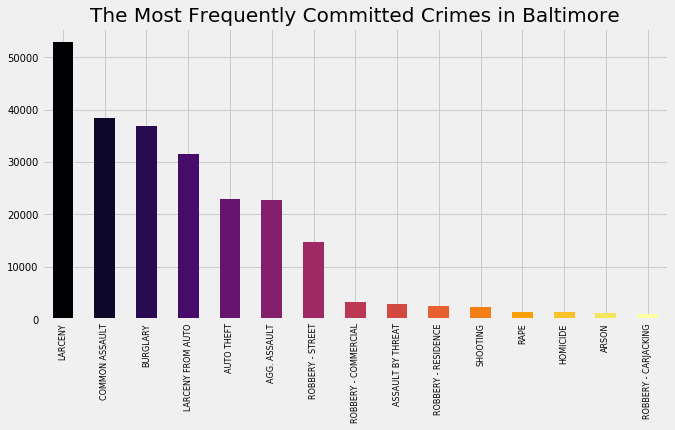

In [18]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
color = plt.cm.inferno(np.linspace(0, 1, 15))
df['Description'].value_counts().plot.bar(color=color)

plt.title('The Most Frequently Committed Crimes in Baltimore',fontsize = 20,color='black')
plt.xticks(rotation = 90,fontsize=8,color='black')
plt.yticks(fontsize=10,color='black')
plt.show()

As we can see the most common crimes in Baltimore are: larceny, common assault, and burglary.

#### How has the number of crimes changed over time in Baltimore?

In [19]:
crime= df.groupby(['CrimeDate']).size().rename('Count').reset_index().sort_values('CrimeDate')

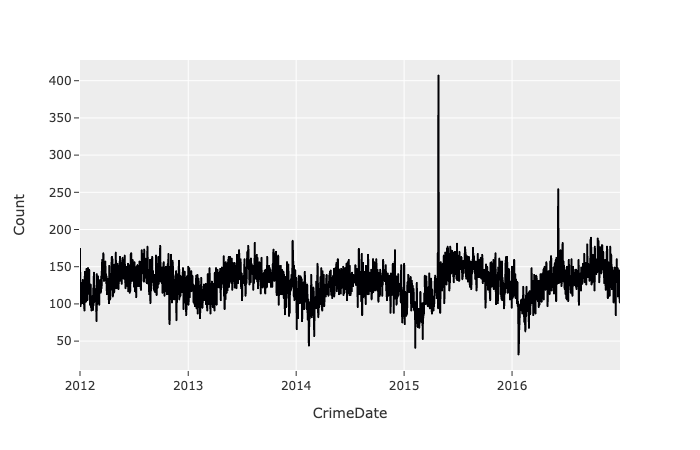

In [20]:
fig = px.line(crime, x='CrimeDate', y ='Count', color_discrete_sequence=px.colors.sequential.Inferno)
fig.update_layout(template="ggplot2")
fig.show()

From the trend above, we can see that the frequency was slightly decreasing from November and increasing from February each year. 

In [21]:
crime.mean()

Count    129.497537
dtype: float64

Every day on average there were 129 crimes committed. We can notice on the chart that there were times when the crime rate was much above the average. 15th of April 2015 there was 407 crimes committed and 5th June of 2016 there were 254 crimes committed. 

#### What category of crimes were increasing and which were decreasing over time?

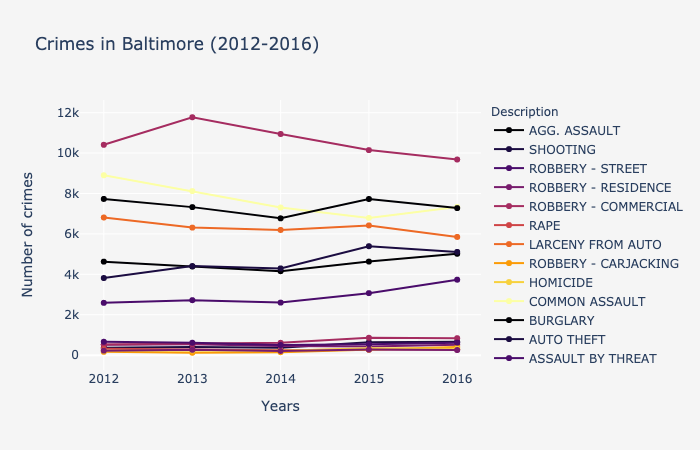

In [22]:
df_crime= df.groupby(['Year', 'Description']).size().rename('Count').reset_index().sort_values('Year')

fig = px.line(df_crime, x="Year", y='Count', color="Description",title='Crimes in Baltimore (2012-2016)',color_discrete_sequence=px.colors.sequential.Inferno)
fig.update_layout(xaxis_title='Years',yaxis_title='Number of crimes',paper_bgcolor='whitesmoke',plot_bgcolor='whitesmoke')
fig.update_traces(mode='lines+markers')
fig.show()

From the above chart, we can notice that the following crimes had an increasing trend: robbery(street), aggravated assault and robbery (commercial) and crimes like larceny, common assault, and larceny from auto had a decreasing trend. 

#### Are there certain high crime locations?

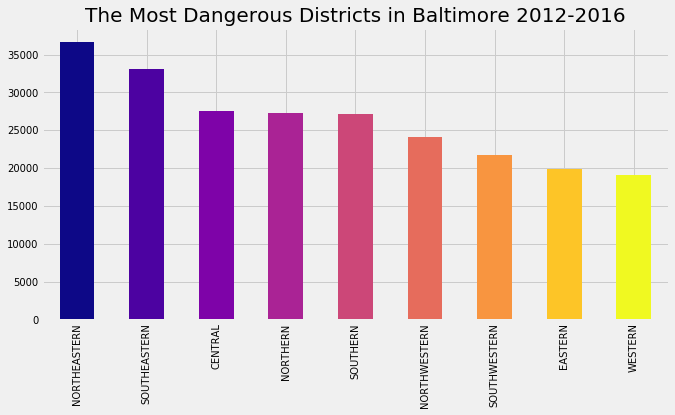

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
color = plt.cm.plasma(np.linspace(0, 1, 9))
df['District'].value_counts().plot.bar(color=color)

plt.title('The Most Dangerous Districts in Baltimore 2012-2016',fontsize = 20,color='black')
plt.xticks(rotation = 90,fontsize=10,color='black')
plt.yticks(fontsize=10,color='black')
plt.show()

In [24]:
neighborhood = df.groupby(['Neighborhood']).size().rename('Count').reset_index().sort_values('Count')

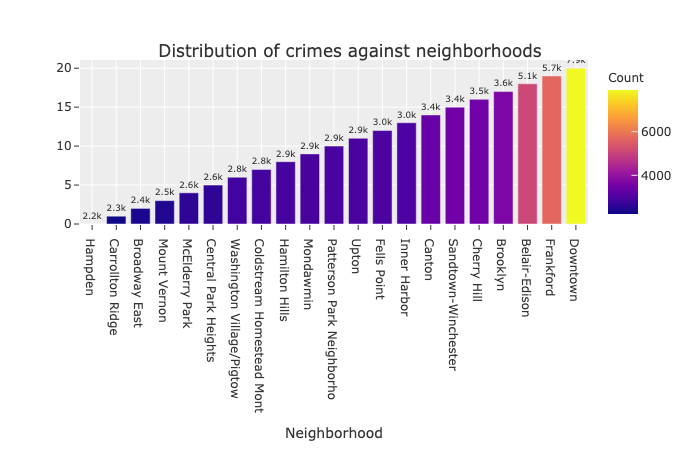

In [25]:
fig = px.bar(neighborhood[-21:], x='Neighborhood',color='Count',text='Count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(template="ggplot2")
fig.update_layout(showlegend=False)
fig.update_layout(title={'text': "Distribution of crimes against neighborhoods",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

Surprisingly the neighborhood with the highest rate of crime - Downtown(7904) -  belongs to the Central district that is the third district by a number of crimes in Baltimore. The next two neighborhoods: Frankford (5680) and Belair- Edison (5098) belong to Northeastern district which might be probably the reason why it has the highest number of crime incidents. 

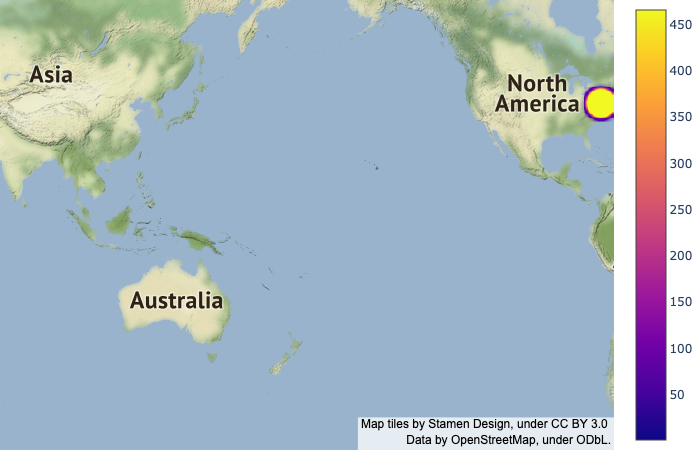

In [26]:
loc = df.groupby(['Latitude', 'Longitude']).size().rename('Count').reset_index().sort_values('Latitude')

fig = go.Figure(go.Densitymapbox(lat=loc.Latitude, lon=loc.Longitude, z=loc.Count,radius=15))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Which of the Baltimore Districts had an increasing and which had a decreasing amount of crime events? 

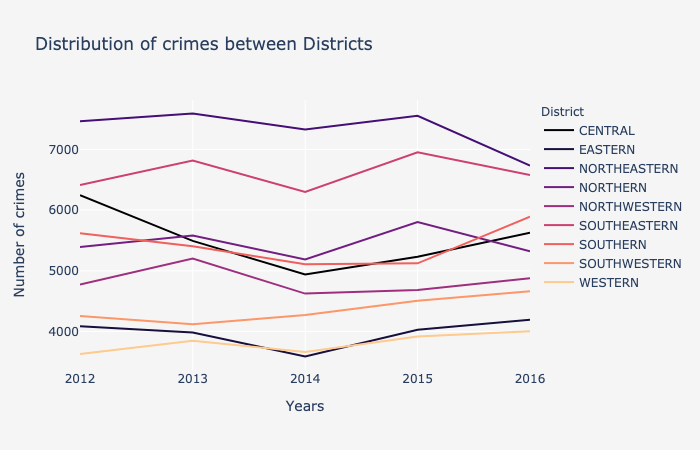

In [27]:
district= df.groupby(['Year', 'District']).size().rename('Count').reset_index().sort_values('Year')
fig = px.line(district, x="Year", y="Count", color="District",title='Distribution of crimes between Districts',color_discrete_sequence=px.colors.sequential.Magma)
fig.update_layout(xaxis_title='Years',yaxis_title='Number of crimes',paper_bgcolor='whitesmoke',plot_bgcolor='whitesmoke')
fig.update_traces(mode='lines')
fig.show()

For Northeastern and Northwestern districts crime activity was decreasing and for Southwestern, Southern and Western districts' crime activity was slightly increased during this time period. 

#### Which season was getting the most crimes?

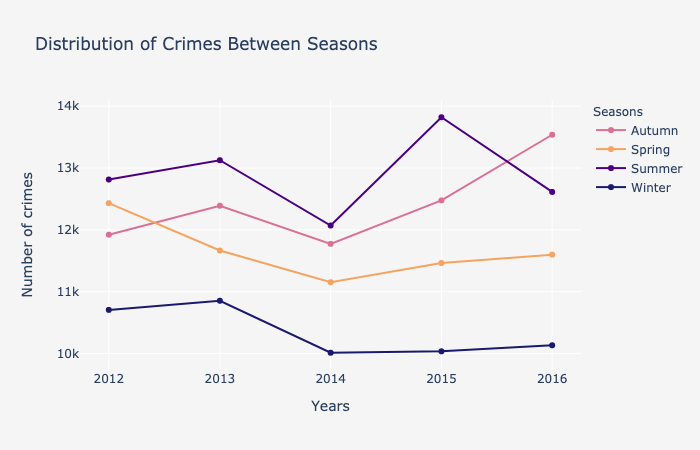

In [28]:
seasons = df.groupby(['Year', 'Seasons']).size().rename('Count').reset_index().sort_values('Year')
fig = px.line(seasons, x="Year", y="Count", color="Seasons",title='Distribution of Crimes Between Seasons',color_discrete_sequence=['palevioletred','sandybrown','indigo','midnightblue'])
            
fig.update_layout(xaxis_title='Years',yaxis_title='Number of crimes',paper_bgcolor='whitesmoke',plot_bgcolor='whitesmoke')
fig.update_traces(mode='lines+markers',showlegend=True)
fig.show()

The crime incidents frequency was higher in summer and autumn seasons and much lower in the winter season. We can notice that the number of crimes slightly decreased for each season in 2014 which was probably related to a little bit lower crime frequency in that year. 

#### Which part of a day most of the crimes were committed?

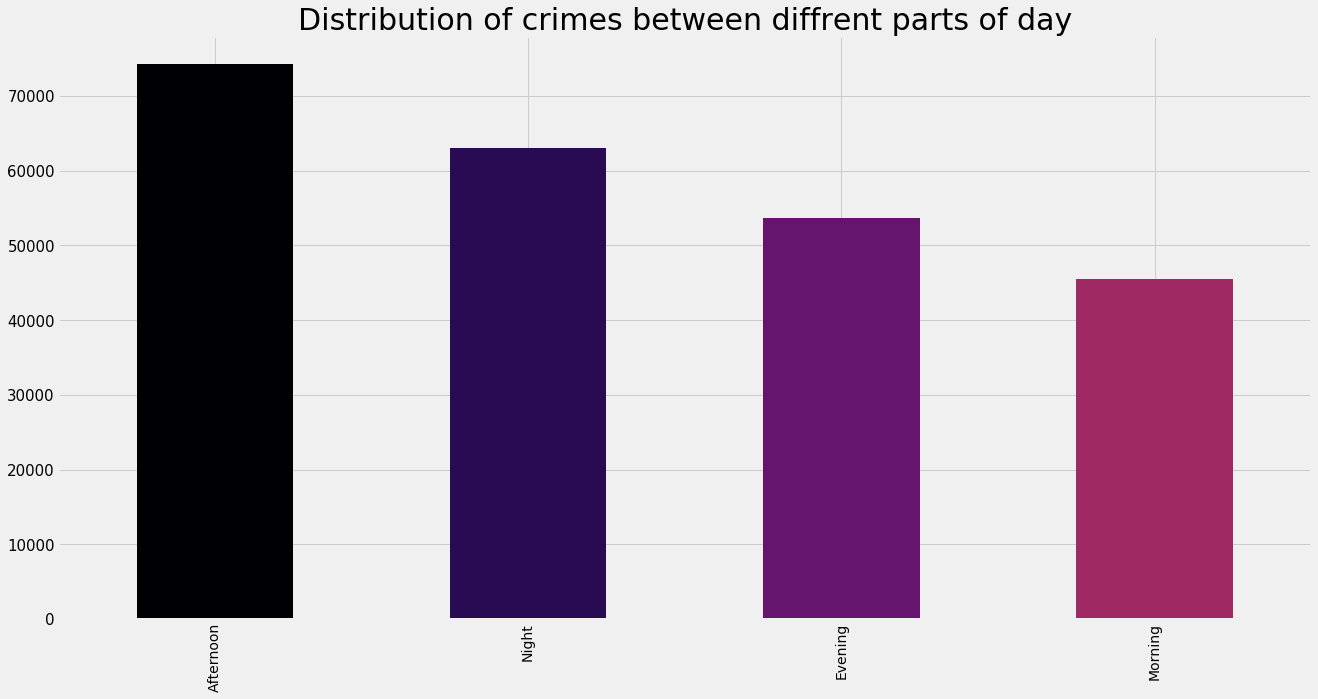

In [29]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')
color = plt.cm.inferno(np.linspace(0, 1, 8))
df['PartOfDay'].value_counts().plot.bar(color=color)

plt.title('Distribution of crimes between diffrent parts of day',fontsize = 30,color='black')
plt.xticks(rotation = 90,fontsize=14,color='black')
plt.yticks(fontsize=15,color='black')
plt.show()

As we can see, more often crimes happen during afternoon and night and less often happen in the morning

#### Which day of the week had the highest rate of committed crimes ?

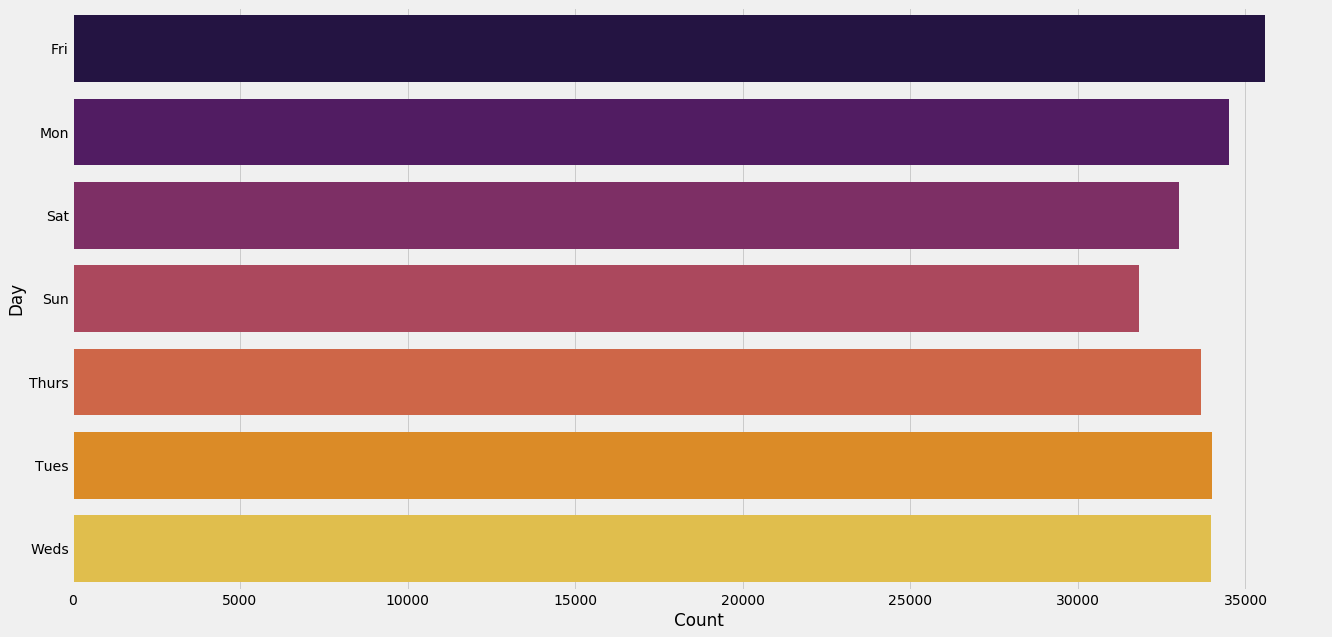

In [30]:
day = df.groupby(['Day']).size().rename('Count').reset_index().sort_values('Day')
sns.barplot(x='Count', y='Day', data=day, palette="inferno");

Much more crimes are committed on Friday then on Sunday. 

#### Were the majority of crimes committed outside or inside?

In [31]:
in_out = df.groupby(['Inside/Outside']).size().rename('Count').reset_index().sort_values('Inside/Outside')

In [32]:
in_out

,Inside/Outside,Count
0,Inside,118709
1,Outside,117883


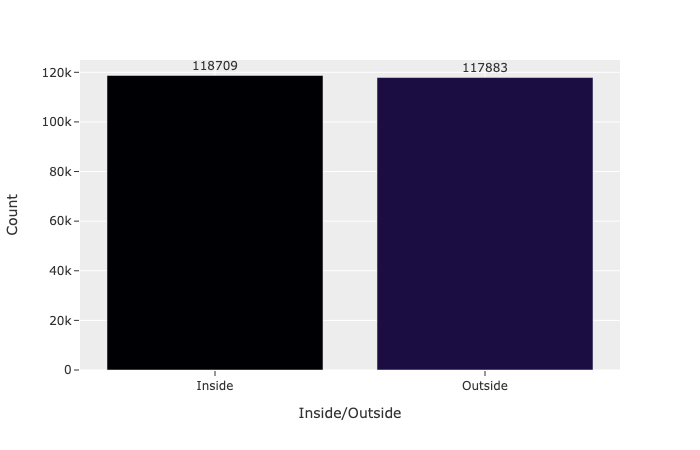

In [33]:
colors=['crimson','yellow']
fig = px.bar(in_out, x='Inside/Outside', y='Count',text='Count', color = 'Inside/Outside',color_discrete_sequence=px.colors.sequential.Inferno)
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(template="ggplot2")
fig.update_layout(showlegend=False)
fig.show()

 As we can see more crimes are committed inside than outside.

## 3. Conclusions

* The most common crime in Baltimore in years 2012-2016 was larceny. But in the past few years there has been a decrease in that activity.
* We can also observe a higher rates of crime in summer and autumn seasons.  
* Northeastern district is the most dangerous district in Baltimore - especially Frankford and Belair-Edison neighborhoods.
* The most dangerous neighborhood in Baltimore is Downtown which is located in Central district. 
* Sunday is the day of the week when the lowest amount of crimes incidents is happening. The highest rate of committed crimes has Friday. 
* More crimes are committed inside than outside but there isn't a huge difference. 